In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### Escalado de los datos y asignacion de pesos a las variables

In [3]:
df_analisis_out = pd.read_excel('df_outliers.xlsx')
df_analisis_sinout = pd.read_excel('df_sin_outliers.xlsx')
df=pd.read_excel('df_procesado.xlsx')
df_empresas=pd.read_excel('df_empresas.xlsx')

In [4]:
df_analisis_sinout_sinnif = df_analisis_sinout.drop(["Código NIF"],axis = 1)

In [5]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_analisis_sinout_sinnif)

In [6]:
data_scaled

array([[-0.42130873, -0.71654564,  2.69396344, ..., -0.99914681,
         1.1156542 ,  1.6483314 ],
       [-0.42130873, -0.71654564,  2.77301634, ..., -0.99914681,
        -0.52667018,  1.6483314 ],
       [-0.42130873, -0.71654564,  3.21985567, ..., -0.30447551,
        -1.34783238,  0.79225848],
       ...,
       [ 2.37355633, -0.71654564,  0.01344052, ...,  1.08486707,
        -0.52667018,  0.79225848],
       [ 2.37355633, -0.71654564, -0.24890874, ...,  1.08486707,
        -0.52667018, -0.91988736],
       [ 2.37355633, -0.71654564, -0.69920292, ..., -1.6938181 ,
        -0.52667018, -1.77596028]])

In [7]:
df_analisis_sinout_sinnif.describe()

,Total activo\nmil EUR\n2022,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate
count,25341.000000,25341.000000,25341.000000,25341.000000,25341.000000
mean,651.164973,2.642279,2.438302,2.641372,2.074543
std,784.300442,1.164088,1.439558,1.217810,1.168148
min,0.027570,0.000000,0.000000,0.000000,0.000000
25%,119.868500,2.000000,1.000000,2.000000,1.000000
50%,325.922250,3.000000,3.000000,3.000000,2.000000
75%,857.121700,4.000000,4.000000,4.000000,3.000000
max,3637.544480,4.000000,4.000000,4.000000,4.000000


In [8]:
df_analisis_sinout_sinnif["ROA_cate"].value_counts().sort_index()

ROA_cate
0    3837
1    2907
2    8124
3    8476
4    1997
Name: count, dtype: int64

In [9]:
df_analisis_sinout_sinnif["Solvencia"].value_counts().sort_index()

Solvencia
0    3704
1    3747
2    3906
3    5706
4    8278
Name: count, dtype: int64

In [10]:
pesos = np.array([0.7,0.7,2.5,1,1,1,1,1,1,1,1.5,2,2,1.5,2])
data_pesos = data_scaled*pesos

## KMEANS

In [11]:
inertia = []
k = range(1, 15)
for n_clusters in k:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42, init = 'k-means++')
    kmeans.fit(data_pesos)
    inertia.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

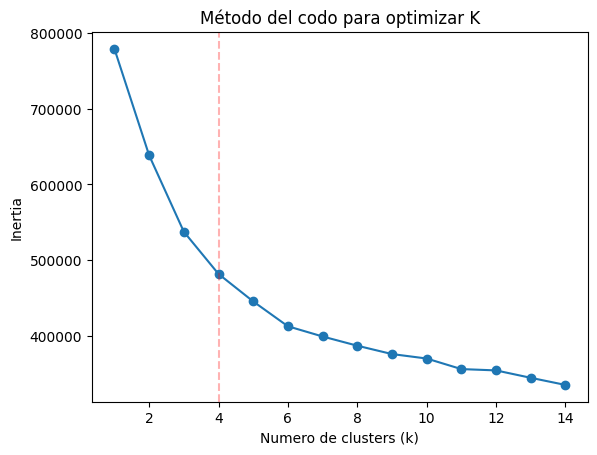

In [12]:
plt.plot(k, inertia, marker = 'o')
plt.title('Método del codo para optimizar K')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inertia')
plt.axvline(x = 4,color = "red",alpha = 0.3,linestyle = "--")
plt.show

Elegimos el modelo con 4 clusters

In [13]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
clusters = kmeans.fit_predict(data_pesos)

In [14]:
silueta_avg = metrics.silhouette_score(data_pesos, kmeans.labels_, metric = 'euclidean')
print(f'Indice silueta: {silueta_avg}')

Indice silueta: 0.2049021154039127


In [15]:
df_analisis_sinout_sinnif["cluster_kmeans"] = kmeans.labels_

In [16]:
df_analisis_sinout_sinnif["cluster_kmeans"].value_counts()

cluster_kmeans
0    12019
2     9404
1     3816
3      102
Name: count, dtype: int64

In [17]:
df_analisis_sinout_sinnif["Solvencia"].value_counts()

Solvencia
4    8278
3    5706
2    3906
1    3747
0    3704
Name: count, dtype: int64

In [18]:
df_analisis_sinout_sinnif.groupby("cluster_kmeans").mean()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Sectores_Actividades Profesionales y Financieras,Sectores_Comercio,Sectores_Construccion e Inmobilarias,Sectores_Hosteleria,Sectores_Industria,Sectores_Transporte,Moneda no euro,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate
cluster_kmeans,,,,,,,,,,,,,,,
0,0.152675,0.352941,400.070273,0.076961,0.179965,0.196605,0.220318,0.050587,0.119394,0.039854,0.0,3.371911,3.441301,2.616857,2.409352
1,0.165094,0.362421,2228.887049,0.053459,0.112945,0.198375,0.260744,0.035639,0.206499,0.051887,0.0,2.995807,2.738470,2.844602,2.221436
2,0.142812,0.312101,322.566231,0.141748,0.128031,0.239579,0.215121,0.094960,0.101446,0.039983,0.0,1.566355,1.033390,2.589111,1.586772
3,0.117647,0.362745,1508.638751,0.039216,0.058824,0.450980,0.039216,0.000000,0.392157,0.009804,1.0,2.637255,2.549020,2.745098,2.098039


Analisis de los clusters

In [19]:
df_analisis_sinout["Cluster kmeans"] = kmeans.labels_

In [20]:
df_analisis_sinout_c0 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 0]
df_analisis_sinout_c1 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 1]
df_analisis_sinout_c2 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 2]
df_analisis_sinout_c3 = df_analisis_sinout[df_analisis_sinout["Cluster kmeans"] == 3]

In [21]:
df_total = pd.concat([df_analisis_sinout,df_analisis_out])

In [22]:
df_total

,Código NIF,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Sectores_Actividades Profesionales y Financieras,Sectores_Comercio,Sectores_Construccion e Inmobilarias,Sectores_Hosteleria,Sectores_Industria,Sectores_Transporte,Moneda no euro,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate,Cluster kmeans
0,B95798278,False,False,2764.00000,False,False,False,True,False,False,False,False,1,1,4,4,1
1,B95869509,False,False,2826.00000,False,False,False,True,False,False,False,False,1,1,2,4,1
2,B20779468,False,False,3176.44937,False,False,False,False,False,False,False,False,2,2,1,3,1
3,A28784635,False,False,1255.54300,False,False,False,False,False,False,True,False,3,3,4,4,0
4,A48173975,False,False,2959.21695,False,False,False,False,False,False,False,False,3,0,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,B01451459,True,False,3727.52321,False,True,False,False,False,False,False,False,1,0,2,0,-1
4013,B01404672,True,False,5137.45046,False,False,False,True,False,False,False,False,1,4,2,1,-1
4014,B01518513,True,False,8474.33033,False,False,False,True,False,False,False,False,1,1,2,1,-1
4015,B01384627,True,False,8116.22665,False,False,False,True,False,False,False,False,1,3,2,2,-1


Empresa reciente:

In [23]:
print(f'Ratio empresa reciente / no reciente c0: {df_analisis_sinout_c0["Empresa reciente"].sum()/(len(df_analisis_sinout_c0)-df_analisis_sinout_c0["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c1: {df_analisis_sinout_c1["Empresa reciente"].sum()/(len(df_analisis_sinout_c1)-df_analisis_sinout_c1["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c2: {df_analisis_sinout_c2["Empresa reciente"].sum()/(len(df_analisis_sinout_c2)-df_analisis_sinout_c2["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c3: {df_analisis_sinout_c3["Empresa reciente"].sum()/(len(df_analisis_sinout_c3)-df_analisis_sinout_c3["Empresa reciente"].sum())}')
print(f'Ratio empresa reciente / no reciente c-1: {df_analisis_out["Empresa reciente"].sum()/(len(df_analisis_out)-df_analisis_out["Empresa reciente"].sum())}')

Ratio empresa reciente / no reciente c0: 0.08337840274021995
Ratio empresa reciente / no reciente c1: 0.05647840531561462
Ratio empresa reciente / no reciente c2: 0.16515921199355718
Ratio empresa reciente / no reciente c3: 0.04081632653061224
Ratio empresa reciente / no reciente c-1: 0.05294888597640891


## CLUSTERING JERARQUICO

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
linkage_matrix = linkage(data_pesos, method = 'ward')

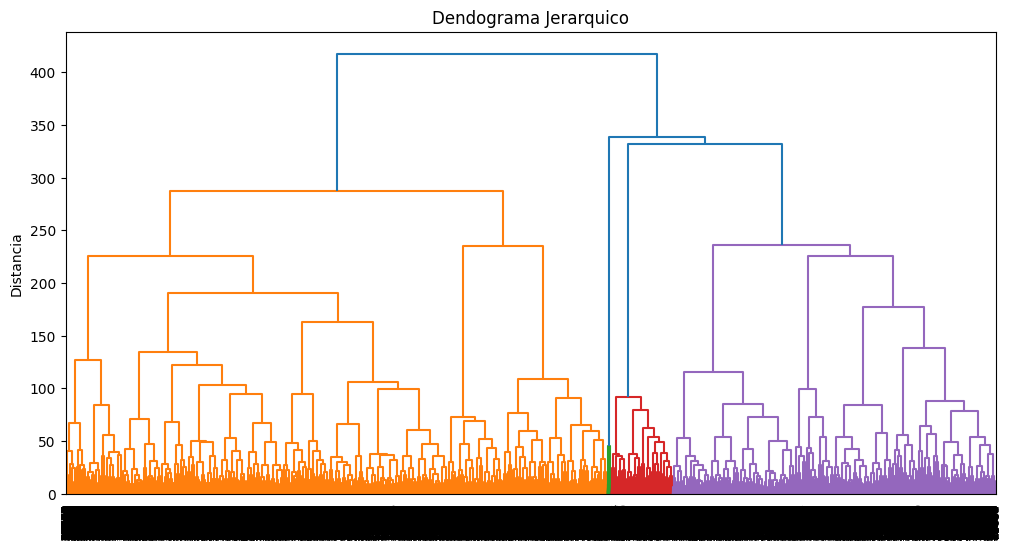

In [26]:
plt.figure(figsize=(12,6))
dendrogram(linkage_matrix, labels=df_analisis_sinout_sinnif.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendograma Jerarquico')
plt.ylabel('Distancia')
plt.show()

In [27]:
n_clusters = 4
model = AgglomerativeClustering(n_clusters = n_clusters, connectivity=None, linkage = 'ward', distance_threshold = None)
clusters = model.fit_predict(data_pesos)

df_analisis_sinout_sinnif['Cluster_jerar'] = clusters

In [28]:
df_analisis_sinout_sinnif["Cluster_jerar"].value_counts()

Cluster_jerar
0    14773
1     8790
3     1676
2      102
Name: count, dtype: int64

In [29]:
df_analisis_sinout_sinnif.groupby("Cluster_jerar").mean()

,Provincia_Alava,Provincia_Guipuzcoa,Total activo\nmil EUR\n2022,Empresa reciente,Sectores_Actividades Profesionales y Financieras,Sectores_Comercio,Sectores_Construccion e Inmobilarias,Sectores_Hosteleria,Sectores_Industria,Sectores_Transporte,Moneda no euro,Endeudamiento_cate,Solvencia,Evolucion_ventas_cate,ROA_cate,cluster_kmeans
Cluster_jerar,,,,,,,,,,,,,,,,
0,0.136668,0.334529,314.364490,0.143640,0.142287,0.296893,0.199350,0.104583,0.075814,0.000000,0.0,2.229811,1.963718,2.626278,1.813714,1.158939
1,0.173606,0.338453,809.478637,0.036519,0.171217,0.071900,0.264733,0.000000,0.184187,0.119795,0.0,3.253242,3.164846,2.618544,2.487600,0.435495
2,0.117647,0.362745,1508.638751,0.039216,0.058824,0.450980,0.039216,0.000000,0.392157,0.009804,1.0,2.637255,2.549020,2.745098,2.098039,3.000000
3,0.156921,0.383652,2737.390572,0.011337,0.113962,0.211814,0.235084,0.054893,0.261337,0.000000,0.0,3.073986,2.804296,2.887828,2.205847,0.999403


In [30]:
silhouette_avg = metrics.silhouette_score(data_pesos, clusters)
print(f'Índice de Silueta: {silhouette_avg}')

Índice de Silueta: 0.09672806305148762


In [31]:
sil_sc = {}
# print(f'Indice silueta: {silueta_avg}')
for n_clusters in range(2,6):
    model = AgglomerativeClustering(n_clusters = n_clusters, connectivity=None, linkage = 'ward', distance_threshold = None)
    clusters = model.fit_predict(data_pesos)
    silueta_avg = metrics.silhouette_score(data_pesos, clusters, metric = 'euclidean')
    sil_sc[str(n_clusters)] = silueta_avg


In [32]:
sil_sc

{'2': 0.1168408540633913,
 '3': 0.11787623026592846,
 '4': 0.09672806305148762,
 '5': 0.08426162569545974}

In [33]:
model = AgglomerativeClustering(n_clusters = 5, connectivity=None, linkage = 'ward', distance_threshold = None)
clusters = model.fit_predict(data_pesos)

## OPTICS
Para Optics hemos decidido usas las ratios no categorizadas. Pues de este modo se obtienen mejores resultados con este modelo, el cual no se ve distorsionado por outliers.

In [34]:
from sklearn.cluster import OPTICS,DBSCAN
from sklearn.metrics import silhouette_score

In [59]:
df=pd.read_excel('df_procesado.xlsx')
df.set_index("Código NIF", inplace=True)
df.index.name=None
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
pesos = np.array([1,1,3.5,2.5,2,2,2,2,2,2,2.5,3,3,3,3])
X = data_scaled*pesos

Hemos utilizado este bucle para seleccionar los mejores parámetros para Optics. Es un método similar a GridSeach(), pero en este caso, optimizando por la Silueta.
El código está desactivado ahora, debido a los altos requerimientos computacionales para ejecutarlo.

In [60]:
#parameter_values = {
#    'min_samples': [2, 5, 10, 15],
#    'xi': [0.05, 0.1, 0.2, 0.25],
#    'metric': ['euclidean', 'manhattan', 'cosine']
#}

#best_score = -1
#best_params = None
#
#
#for min_samples in parameter_values['min_samples']:
#    for xi in parameter_values['xi']:
#        for metric in parameter_values['metric']:
#            optics = OPTICS(min_samples=min_samples, xi=xi,metric=metric)
#            optics.fit(X)
#            silhouette_avg = silhouette_score(X, optics.labels_)
#            if silhouette_avg > best_score:
#                best_score = silhouette_avg
#                best_params = {
#                    'min_samples': min_samples,
#                    'xi': xi,
#                    'metric': metric
#                                }
#
#print("Best Silhouette Score:", best_score)
#print("Best Parameters:", best_para

In [61]:
best_params= {'min_samples': 15, 'xi': 0.2, 'metric': 'euclidean'}

In [ ]:
optics = OPTICS(min_samples=best_params['min_samples'], xi=best_params['xi'], metric=best_params['metric'])
optics.fit(X)

In [ ]:
best_score=silhouette_score(X, optics.labels_)
print("Best Parameters:", best_params)

In [ ]:
optics_labels = optics.labels_
df['Optics_Labels'] = optics_labels

In [ ]:
df.groupby(['Optics_Labels'])['Total activo\nmil EUR\n2022'].count()

In [ ]:
df.groupby(['Optics_Labels'])['Total activo\nmil EUR\n2022'].mean()

## Selección final de Grupos

Hemos considerado que el modelo seleccionado para el análisis final de los clusters es el K-means. Pues es este modelo el único que nos permite obtener un número razonable de grupos, de forma que se pueda hacer un análisis individualizado de cada grupo, sin tener una silueta demasiado baja.

In [53]:
# Mapeo clusters

def mapeo_clusters(valor):
    if valor == 2:
        return 1
    elif valor == 0:
        return 2
    elif valor == 3:
        return 3
    elif valor == 1:
        return 4
    else:
        return 5
    
df_total["Cluster kmeans"] = df_total["Cluster kmeans"].apply(mapeo_clusters)

In [54]:
# Nombre clusters

def nombre_clusters(valor):
    if valor == 1:
        return 'Pequeños_comercios'
    elif valor == 2:
        return 'Pequeñas_empresas_con_buenas_ratios'
    elif valor == 3:
        return 'Empresas_con_moneda_extranjera'
    elif valor == 4:
        return 'Medianas_Empresas'
    elif valor == 5:
        return 'Grandes_Empresas'
    
df_total["Nombre_kmeans"] = df_total["Cluster kmeans"].apply(nombre_clusters)

In [55]:
df_total.columns

Index(['Código NIF', 'Provincia_Alava', 'Provincia_Guipuzcoa',
       'Total activo\nmil EUR\n2022', 'Empresa reciente',
       'Sectores_Actividades Profesionales y Financieras', 'Sectores_Comercio',
       'Sectores_Construccion e Inmobilarias', 'Sectores_Hosteleria',
       'Sectores_Industria', 'Sectores_Transporte', 'Moneda no euro',
       'Endeudamiento_cate', 'Solvencia', 'Evolucion_ventas_cate', 'ROA_cate',
       'Cluster kmeans', 'Nombre_kmeans'],
      dtype='object')

In [56]:
df_total=pd.merge(df_total, df_empresas, on='Código NIF', how='left')

In [57]:
df_clusters=df_total[['Nombre', 'Código NIF' ,'Cluster kmeans', 'Nombre_kmeans']]

In [58]:
df_total.to_excel('df_clusters.xlsx', index=False)
df_clusters.to_excel('empresas_clasificadas_final.xlsx', index=False)